In [1]:
import os
import sys
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
from tqdm.notebook import tqdm
%matplotlib inline

In [2]:
import pickle
from cka import cka

### Exp many clusters

In [3]:
np.random.seed(7)

all_clusters = []

for i in range(60):
    all_clusters.append(np.random.multivariate_normal(np.zeros(2), np.eye(2), 5))
    
A_base = np.concatenate(all_clusters)

In [4]:
def split2clusters(k):
    
    if k == 1:
        return A_base
    
    arr = []
    
    for i in range(60):
        idx = i % k
    
        theta = 2 * np.pi * idx / k
        d = np.array([np.cos(theta), np.sin(theta)]) * 10
        
        arr.append(all_clusters[i] + d)
        
    A_mod = np.concatenate(arr)
    
    return A_mod

In [10]:
def hsic_rbf(P, Q, sigma_coeff = 0.2):
    K = pairwise_distances(P, P)
    L = pairwise_distances(Q, Q)
    
    sigma_p = sigma_coeff * np.median(K)
    sigma_q = sigma_coeff * np.median(L)

    K = np.exp(-K**2 / 2 / (sigma_p**2))
    L = np.exp(-L**2 / 2 / (sigma_q**2))
    
    n = P.shape[0]
    H = np.eye(n) - np.ones((n, n)) / n

    return np.trace(K @ H @ L @ H) / (n-1)**2

In [29]:
def cka_rbf(P, Q, sigma_coeff = 0.2):
    return hsic_rbf(P, Q, sigma_coeff = sigma_coeff) / np.sqrt(hsic_rbf(P, P, sigma_coeff = sigma_coeff) * hsic_rbf(Q, Q, sigma_coeff = sigma_coeff))

In [33]:
hsic_rbf(A_base + np.array((1, 3)), A_mod)

0.003139285659922822

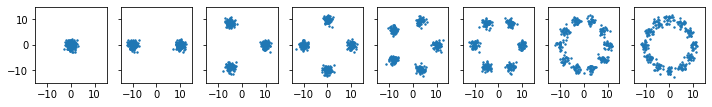

In [12]:
ALL = [2, 3, 4, 5, 6, 10, 12]

fig, ax = plt.subplots(1, len(ALL) + 1)
fig.set_size_inches(12, 1.4)

for idx, k in enumerate([0] + ALL):
    
    if idx == 0:
        A = A_base
    else:
        A = split2clusters(k)

    ax[idx].scatter(x = A[:,0], y = A[:,1], s = 2)
    ax[idx].set_xlim(-15, 15)
    ax[idx].set_ylim(-15, 15)
    
for ax in fig.get_axes():
    ax.label_outer()

In [54]:
res_cka = []

barcs1 = []
barcs2 = []

for i, k in enumerate(ALL):
    
    A_mod = split2clusters(k)
    res_cka.append(cka_rbf(A_base, A_mod, sigma_coeff = 0.2))

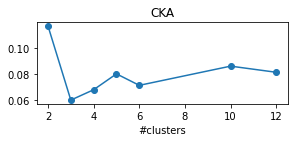

In [55]:
clusters_list = [2, 3, 4, 5, 6, 10, 12]

fig, ax = plt.subplots(1, 1)

fig.set_size_inches((4.5, 1.5))
ax.set_xlabel('#clusters')
#ax.set_ylim(0.0, 0.03)
plt.title('CKA')
plt.plot(clusters_list, res_cka[:len(clusters_list)], 'o-')
plt.show()

In [56]:
stats.kendalltau(res_cka, clusters_list).correlation

0.23809523809523814